## Jakub Sacha, gr.1

# TEMAT №10 Szeregi czasowe (ang. time series)

 
 ### Czym są szeregi czasowe? 
 Szereg czasowy jest zbiorem obserwacji dokonywanych w równych odstępach czasu. 
 Służy do przewidywania przyszlych wartości w oparciu o poprzednie obserwacje, do których zalicza się;
 - prognozowania biznesowe (kursy walut, giełda...)
 - zrozumienia przeszlych zachowań i zaobserwowania przyszlych;
 - oszacowanie bieżących osiągnięć.
 
 Do analizy i prognozowania szeregów czasowych w Python stosowano bibliotekę  statsmodels.tsa.api, która zawiera modele i metody szeregów czasowych. Importowane kanonicznie przy użyciu importu statsmodels.tsa.api jako tsa.
API skupia się na modelach i najczęściej używanych testach statystycznych oraz narzędziach. Ścieżki importu i struktura wyjaśnia projekt dwóch modułów API i jak importowanie z API różni się od bezpośredniego importowania z modułu, w którym zdefiniowany jest model. Więcej informacji znajdziesz w dokumentacji https://www.statsmodels.org/stable/api.html. 
##### Podstawowe komponenty szeregów czasowych:
- trend
- sezonowość
- cykliczność
#### Co to jest Stacjonarność?
Szereg czasowy jest stacjonarny gdy z biegiem czasu zachowuje sie w sposów szczególny, istnieje bardzo duże prawdopodobieństwo, że w przyszlości będę postepować tak samo.
#### Sprawdzić szereg na stacjonarność można za pomocą:
- Rozszerzonego testu Dickeya-Fullera (ADF)
- Przekształcenia logarytmicznego (Box-Cox)
- Dekompozycji trendu sezonowego
- Usuwania trendów poprzez różnicowanie
- Naprawiania niestałej wariancji + usuwanie trendu.
#### Co wskazuje że szereg jest stacjonarnym:
- stała średnia;
- stala wariancja;
- autokowariancja jest niezależna od czasu.



## Czym jest autoregresja? 
Podstawowa koncepcja polega na tym, że prognozujemy interesujące szeregi czasowe y  zakładając, że mają one liniową zależność z innymi szeregami czasowymi x.
Autoregresja – to jest regresja statystyczna w której zmienna objaśniana jest przyszłą wartością ciągu, a zmienna objaśniająca to wartości ciągu czasowego z przeszłości. 
Zmienna prognozowana y jest nazywana także zależną lub objaśnianą. Zmienne predyktorów x są nazywane zmiennymi niezależnymi lub objaśniającymi.
Na przykład możemy prognozować miesięczną sprzedaż y, korzystając z całkowitych wydatków na reklamę x jako predyktora. Albo możemy prognozować dzienne zapotrzebowanie na energię elektryczną y używając temperatury x1 i dnia tygodnia x2 jako predyktorów.

###  Najczęściej stosowane modele statystyczne do prognozowania szeregów czasowych

#### - Wygładzanie wykładnicze 
Metoda obróbki szeregu czasowego zmniejszająca jego wariancję za pomocą ważonej średniej ruchomej z przeszłych wartości, o wagach malejących wykładniczo wraz z odległością w czasie. Stosowana do prostego usuwania szumu lub wizualizacji różnych danych. Jest również przydatna w prognozowaniu szeregów czasowych o niewielkim stosunku sygnału do szumu, szczególnie niemających wyraźnego trendu i wahań sezonowych.


#### - AR (model autoregresyjny)
Modele, w których bieżące wartości szeregu wyrażają się jako liniowe funkcje poprzednich obserwacji, nazywają się modelami autoregresji. Jeżeli bieżąca wartość ciągu xn zależy liniowo tylko od jednej poprzedniej wartości x_(n-1), to taki model jest modelem autoregresji pierwszego rzędu, co oznaczamy jako AR(1). Jeżeli bieżąca wartość ciągu xn zależy liniowo od p poprzednich wartości xn-1,…,xn-p, to taki model jest modelem autoregresji rzędu p, AR(p). 


#### - MA (model średniej ruchomej)
Proces ze średnią ruchomą, jest regresją liniową bieżącej wartości szeregów w odniesieniu do poprzednich wartości błędu, związanych z białym szumem lub przypadkowymi zaburzeniami. Zakłada się, że takie przypadkowe zaburzenia w każdym z punktów pochodzą z tego samego rozkładu, zwykle rozkładu normalnego z zerową wartością oczekiwaną i stałą wariancją. 


#### - ARMA (model autoregresji ze średnią ruchomą)-  obejmuje dwa proste modele ciągów czasowych AR oraz MA. 
Użyteczność modeli ARMA polega na ich oszczędnej reprezentacji. Podobnie jak w przypadku AR i MA, właściwości modeli ARMA można zwykle scharakteryzować za pomocą ich funkcji autokorelacji. Modele ARMA są używane do opisu stacjonarnych ciągów czasowych. Także niektóre rodzaje niestacjonarności można sprowadzać do procesów stacjonarnych przez tworzenie procesów różnic i dalej stosować np.  modele ARMA.


#### - ARIMA (zintegrowany model autoregresji ze średnią ruchomą)
jest złożony z następujących elementów: autoregresja (AR), całkowanie (I) oraz średnia ruchoma (MA). ARIMA jest formą analizy regresji, która mierzy siłę jednej zmiennej zależnej w stosunku do innych zmiennych. Model ten jest szeroko stosowany do prognozowania przyszłych wartości danych, badając różnice między wartościami w ciągach zamiast wartości oryginalnych. Modele zintegrowane służą do opisów procesów stochastycznych niestacjonarnych.
ARIMA z parametrami p, d i q, gdzie:
p - liczba opóźnień obserwacji w modelu.
d - stopień różnicy.
q - zakres średniej ruchomej.


## Dobór modelu

#### 1. Test ADF (rozszerzony test Dickeya-Fullera)
Dla sprawdzenia stacjonarności ciągu robimy analizę za pomocą rozszerzonego testu Dickeya Fullera (ADF). Przy analizie testu ADF warto zwrócić uwagę, że hipoteza zerowa wskazuje na istnienia niestacjonarności. Jeżeli obliczona wartość p jest mniejsza od zadanej alfa, to ta hipoteza zerowa zostaje odrzucona, a ciąg  jest stacjonarny. W przeciwnym razie dane są niestacjonarne.

#### 2. ACF i PACF 

Autokorelacja i autokorelacja cząstkowa to miary związków między bieżącymi i przeszłymi wartościami szeregów określające, które przeszłe wartości szeregów są najbardziej użyteczne przy przewidywaniu przyszłych wartości. Dzięki tej wiedzy można określić kolejność procesów w modelu ARIMA. Dokładniej rzecz ujmując:

##### Funkcja autokorelacji (ACF).
Przy przesunięciu k jest to korelacja między wartościami szeregu oddalonymi o k przedziałów od siebie.
Występuje wtedy, gdy skutki działania zmienności losowej nie wygasają w danym okresie t, lecz są przenoszone na okresy przyszłe. 
plot_acf()
http://drizzt.home.amu.edu.pl/images/DADA/W7.pdf

##### Funkcja autokorelacji cząstkowej (PACF). 
jak sama nazwa wskazuje, PACF jest podzbiorem funkcji autokorelacji (ACF). Przy przesunięciu k jest to korelacja między wartościami szeregu oddalonymi o k przedziałów od siebie, z jednoczesną rejestracją wartości z przedziałów znajdujących się pomiędzy.
ACF i PACF stosowane są do wyboru rzędu modeli.  PACF pokazuje zależność między xn a poprzednimi wartościami, pomijając wpływ pośrednich opóźnień.
plot_pacf()

Oś x wykresu ACF wskazuje przesunięcie, dla jakiego obliczana jest autokorelacja; oś y wskazuje wartość korelacji (między −1 a 1). Na przykład linia rzutowania przy przesunięciu wynoszącym 1 na wykresie ACF oznacza silną korelację między każdą wartością szeregu a wartością poprzedzającą, zaś linia rzutowania przy przesunięciu wynoszącym 2 oznacza silną korelację między każdą wartością a wartością występującą dwa punkty wcześniej itd.
Korelacja dodatnia oznacza, że duże wartości bieżące odpowiadają dużym wartościom dla danego przesunięcia; ujemna korelacja oznacza, że duże wartości bieżące odpowiadają niewielkim wartościom dla danego przesunięcia.
Wartość bezwzględna korelacji stanowi miarę siły powiązania, przy czym większe wartości bezwzględne oznaczają silniejsze relacje.

#### 3. AIC (kryterium informacyjne Akaikego)
jest estymatorem błędu predykcji w próbie, a tym samym względnej jakości modeli statystycznych dla danego zbioru danych. Jest to jeden ze wskaźników dopasowania modelu, który stosuje się do wyznaczenia miary jakości modeli statystycznych dla badanego zbioru danych. To jak błąd średniokwadratowy w autoregresji — im mniejsza liczba, tym lepiej jest dopasowany model. Na ogół model o większej liczbie predyktorów (parametrów) daje dokładniejsze przewidywania, ponadto ma większą skłonność do przeuczenia. Kryteria informacyjne są nazywane metodami porównywania modeli dla zmiennej zależnej, i stosowane są do wyboru najlepszego modelu.



## Biblioteki

- pip install numpy scipy scikit-learn  #--- to the anaconda terminal
- pip install --user pmdarima   #---installing auto-arima
- pip install -U statsmodels   #---instaling  statsmodels
- import pandas as pd
- from pandas import DataFrame
- import datetime 
- from matplotlib import pyplot
- import matplotlib.pyplot as plt
- from statsmodels.tsa.stattools import adfuller
- from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
- from statsmodels.tsa.arima.model import ARIMA
- import pmdarima as pm
- from pmdarima import model_selection
- import numpy as np
- %matplotlib inline


# Zadanie do ćwiczenia   
### Na podstawie danych zawartych w pliku analiza.csv wykonaj następne punkty:
#### 1) Zaimportuj niezbędne biblioteki do szeregów czasowych (https://www.statsmodels.org/stable/api.html), a także biblioteki do operacji na danych oraz tworzenia wykresów.
#### 2) Odczytaj dane z pliku analiza.csv. Pomocne w interpretacji danych są metody: head(), describe(), len(), shape.
#### 3) Wykonaj wstępny wykres uzyskanych danych (typu "scatter") https://miroslawmamczur.pl/006-wykres-rozrzutu-scatter-plot/
#### 4) Oblicz ADF (p-value, 'ADF Statistic)
#### 5) Wykonaj wykres ACF
#### 6) Wykonaj wykres PACF
#### 7) Podzieł szereg na dane na treningowe i testowe oraz oblicz kryterium  AIC dla modelu ARIMA (3,0.1) (results.summary())
#### 8) Za pomocą funkcji AUTO-ARIMA dobierz najlepszy model dla prognozy.
#### 9) Zrób wykreś do prognozy
#### 10) Wnioski

# Rozwiązanie 

###  1) Zaimportuj niezbędne biblioteki do szeregów czasowych a także biblioteki do operacji na danych oraz tworzenia wykresów


In [2]:
import numpy as np
from pmdarima import model_selection
import pmdarima as pm
import pandas as pd
from pandas import DataFrame
import datetime
from matplotlib import pyplot
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
%matplotlib inline


### 2) Odczytaj dane z pliku analiza.csv. Pomocne w interpretacji danych są metody: head(), describe(), len(), shape.


In [3]:
df =pd.read_csv("analiza.csv", sep = ",", decimal = ",", parse_dates=[0])
df.head(7)



,Data,Rezerwacja
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
5,1949-06-01,135
6,1949-07-01,148


In [4]:
len(df)

144

In [5]:
df.describe()

,Rezerwacja
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [6]:
df.shape

(144, 2)

### 3) Wykonaj wstępny wykres uzyskanych danych 


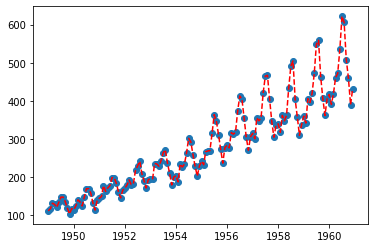

In [8]:
values = df[['Rezerwacja']]
timestamps = df[['Data']]
values.head()
plt.scatter(timestamps, values)
plt.plot(timestamps, values, 'r--')
plt.show()

### 4) Oblicz ADF

In [9]:
#ADF rozszerzony Test Dickeya-Fullera dla sprawdzenia stacjonarności

from pandas import read_csv
from statsmodels.tsa.stattools import adfuller

result = adfuller(values)

print('p-value: %f' % result[1])
print('ADF: %f' % result[0])

p-value: 0.991880
ADF: 0.815369


Hipotezą zerową testu ADF jest to, że dany szereg czasowy jest niestacjonarny. Zwracana wartość p testu ADF jest większa niż poziom istotności (0.05) zatem nie jesteśmy w stanie obalić hipotezy zerowej i stwierdzamy, że badany szereg czasowy jest niestacjonarny, więc musimy dobrać odpowiedni stopień różnicy d w modelu ARIMA aby uzyskać szereg stacjonarny.

### 5) Wykonaj wykres ACF


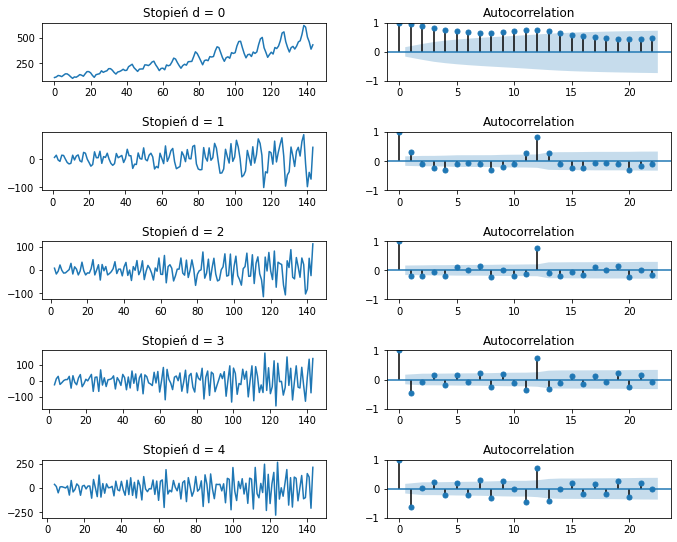

In [10]:
#ACF wykres funkcji autokorelacji
values = df.Rezerwacja
d_max = 5
fig, axes = plt.subplots(d_max, 2)
fig.set_size_inches((10, 8))
fig.tight_layout(pad=3)
for d in range(d_max):
    axes[d, 0].plot(values); axes[d, 0].set_title(f'Stopień d = {d}')
    plot_acf(values.dropna(), ax=axes[d, 1])
    values = values.diff()


plt.show()


p-value: 0.054213
ADF: -2.829267


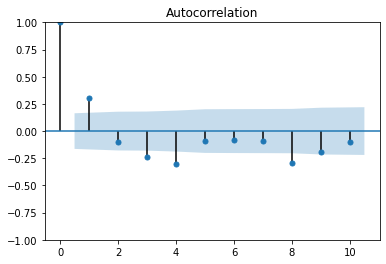

In [11]:
values = df.Rezerwacja
plot_acf(values.diff().dropna(), lags=10)
result = adfuller(values.diff().dropna())

print('p-value: %f' % result[1])
print('ADF: %f' % result[0])

Po wykresie ACF można zauważyć, że już dla stopnia różnicy d równego 1 szereg czasowy jest w miarę stacjonarny. Nie potwierdza tego niestety p wartość która jest niewiele większa od poziomu istotności, lecz z powodu możliwości przesadzenia z stopniem różnicy(mogąca negatywnie wpłynąć na parametry naszego szeregu czasowego) uznaję to za satysfakcjonujący poziom (słabej) stacjonarności. Decyzję popiera również fakt istnienia widocznego gołym okiem liniowego trendu, a stopień różnicowy d > 1 usuwa nieliniowe trendy.

Patrząc na wykres autokorelacji dla jednokrotnie zróżnicowanego szeregu czasowego można powiedzieć, że poza pierwszym współczynnikiem pozostałe nie przekraczają (znacząco) poziomu linii istotności, zatem współczynnik q wskazałbym jako 1 lub 2.

### 6) Wykonaj wykres PACF


/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


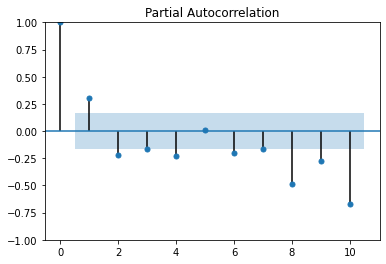

In [12]:
#PACF - wykres częsciowej funkcji autokorelacji
values = df.Rezerwacja
plot_pacf(values.diff().dropna(), lags=10)
plt.show()

Wykres cześciowej autokorelacji jest bardzo podobny do wykresu autokorelacji i wskazuje w podobny sposób, że możemy wstępnie nadać współczynnikowi p wartość 1 lub 2.

### 7) Podzieł szereg na dane treningowe i testowe wędlug uznania oraz oblicz kryterium  AIC dla modelu ARIMA (3,0,1) (results.summary())

In [13]:
#ARIMA

X = df.Rezerwacja
train = X[:134] # dane treningowe
test = X[134:]  #dane testowe
predictions = [train, test]
model = ARIMA(train, order=(1, 1,1))
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:             Rezerwacja   No. Observations:                  134
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -634.228
Date:                Mon, 12 Dec 2022   AIC                           1274.456
Time:                        22:05:25   BIC                           1283.127
Sample:                             0   HQIC                          1277.980
                                - 134                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5499      0.099     -5.544      0.000      -0.744      -0.355
ma.L1          0.9271      0.051     18.235      0.000       0.827       1.027
sigma2       806.4624     92.643      8.705      0.0

### 8) Za pomocą funkcji AUTO-ARIMA dobierz najlepszy model dla prognozy.

In [14]:
#AUTO-ARIMA
split_index = 132
X = df.Rezerwacja
train = X[:split_index+1] # dane treningowe
test = X[split_index:]  #dane testowe



In [15]:
arima_model=pm.auto_arima(train, exogenous=None, seasonal=False, m=1, d=1, D=1,   #pm.auto.arima
                          max_p=4, max_q=3, trace=True, error_action='ignore',
                          suppress_warning=True)
print(arima_model.summary())


sarima_model=pm.auto_arima(train, exogenous=None, seasonal=True, m=12, d=1, D=1,   #pm.auto.arima
                          max_p=4, max_q=3, trace=True, error_action='ignore',
                          suppress_warning=True)
print(sarima_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1226.856, Time=2.00 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1286.405, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1276.949, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1273.468, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1285.130, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1229.745, Time=0.78 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1267.370, Time=0.28 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.61 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.75 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=2.56 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=1233.853, Time=1.12 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept
Total fit time: 

# Wykonaj wykres prognozy

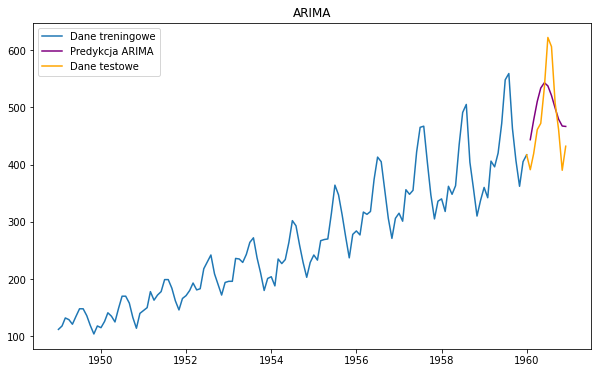

In [16]:
n_periods = len(test)
fitted, confint = arima_model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = test.index

fitted_series = pd.Series(fitted, index=index_of_fc)
plt.figure(figsize=(10, 6))

plt.plot(df.Data[:split_index+1], train)
plt.plot(df.Data[split_index:], fitted_series, color='purple')
plt.plot(df.Data[split_index:], test, color='orange')

plt.legend(["Dane treningowe", "Predykcja ARIMA", "Dane testowe"])
plt.title("ARIMA")
plt.show()

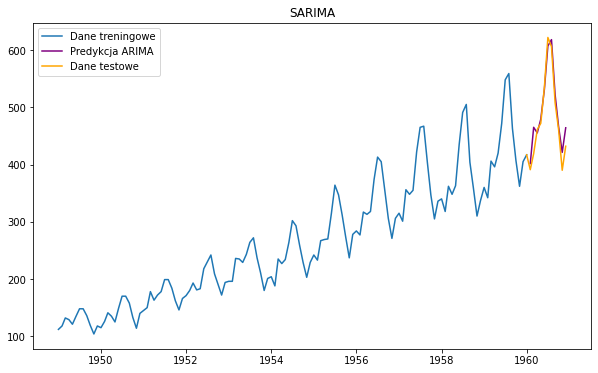

In [17]:
n_periods = len(test)
fitted, confint = sarima_model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = test.index

fitted_series = pd.Series(fitted, index=index_of_fc)
plt.figure(figsize=(10, 6))

plt.plot(df.Data[:split_index+1], train)
plt.plot(df.Data[split_index:], fitted_series, color='purple')
plt.plot(df.Data[split_index:], test, color='orange')

plt.legend(["Dane treningowe", "Predykcja ARIMA", "Dane testowe"])
plt.title("SARIMA")
plt.show()


## Wnioski

Jak można zauważyć to model ARIMA nie opisuje zbyt dokładnie nasz szereg czasowy, lecz jak można odczytać funkcja auto_arima dobrała najlepsze parametry (p, d, q) = (2, 1, 2), zatem przeprowadzona przeze mnie analiza była w miarę poprawna(oszacowałem p jako 1 albo 2, d jako 1 i q jako 1 albo 2). Niestety model ARIMA niezbyt dokładnie odzwierciedla dane testowe. Znacznie skuteczniejszym modelem jest tutaj SARIMA, która uwzględnia również sezonowość.